<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Formula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width='50%' aling='center' src='https://github.com/leonarddocchagas/data_science/blob/master/projetos/formula1/f1-logo.png?raw=true' />

**Formula 1 World Championship**

Fórmula 1 é a mais popular modalidade de automobilismo do mundo. É a categoria mais avançada do esporte a motor e é regulamentada pela Federação Internacional de Automobilismo.

A história da Fórmula 1 tem início com as competições de Grandes Prêmios disputadas na Europa, no início do século XX, apenas com uma pausa de 1939 até 9 de Setembro de 1945, no Circuito de Silverstone, prosseguindo até a atualidade, sem interrupções e com 72 pistas usadas

*fonte:* https://pt.wikipedia.org/wiki/F%C3%B3rmula_1 

## Sobre os dados

O dados estão separados em diversos arquivos. A depender da análise, será necessário fazer a junção das bases para obter mais informação.

* Dados coletados do keggle
  * Datasets: https://bit.ly/3hDUNLZ

* Lista datasets:
  * circuits.csv
  * constructor_results.csv
  * constructor_standings.csv
  * constructors.csv
  * driver_standings.csv
  * drivers.csv
  * lap_times.csv
  * pit_stops.csv
  * qualifying.csv
  * races.csv
  * results.csv
  * seasons.csv
  * status.csv




##Obtenção e transformação dos dados

**Carrega e verifica dataset**

In [1]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# dataset drives
df_driver = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/formula1/drivers.csv')
df_driver.drop(columns=['url', 'number', 'dob', 'driverRef'], inplace=True)
df_driver.loc[:0]

,driverId,code,forename,surname,nationality
0,1,HAM,Lewis,Hamilton,British


In [3]:
# dataset driver_standings
df_driver_standings = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/formula1/driver_standings.csv')
df_driver_standings.drop(columns=['driverStandingsId'], inplace=True)
df_driver_standings.loc[:0]

,raceId,driverId,points,position,positionText,wins
0,18,1,10.0,1,1,1


In [4]:
# dataset racer
df_racer = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/formula1/races.csv')
df_racer.drop(columns=['url', 'time'], inplace=True)
df_racer.head(1)

,raceId,year,round,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,2009-03-29


Com os dataset separados, vamos unir o `df_driver`, `df_driver_standings`, `df_race`, assim, temos uma visão geral a performance de pontuação dos pilotos. 

In [5]:
# juntando os datasets com (left join)
df_full = pd.merge(df_driver_standings, df_driver, how='left', on='driverId')
df_full = pd.merge(df_full, df_racer, how='left', on='raceId')

# deletando colunas
df_full.drop(columns=['raceId', 'driverId', 'circuitId'], inplace=True)
df_full.head()

,points,position,positionText,wins,code,forename,surname,nationality,year,round,name,date
0,10.0,1,1,1,HAM,Lewis,Hamilton,British,2008,1,Australian Grand Prix,2008-03-16
1,8.0,2,2,0,HEI,Nick,Heidfeld,German,2008,1,Australian Grand Prix,2008-03-16
2,6.0,3,3,0,ROS,Nico,Rosberg,German,2008,1,Australian Grand Prix,2008-03-16
3,5.0,4,4,0,ALO,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,2008-03-16
4,4.0,5,5,0,KOV,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,2008-03-16


In [6]:
# verificando entradas
print('Entradas:', df_full.shape[0])
print('Variáveis: ', df_full.shape[1])

Entradas: 33025
Variáveis:  12


In [7]:
# os tipos de dados
df_full.dtypes

points          float64
position          int64
positionText     object
wins              int64
code             object
forename         object
surname          object
nationality      object
year              int64
round             int64
name             object
date             object
dtype: object

In [8]:
# dados ausentes
df_full.isnull().sum()

points          0
position        0
positionText    0
wins            0
code            0
forename        0
surname         0
nationality     0
year            0
round           0
name            0
date            0
dtype: int64

Logo após verificar as 5 primeiras entradas em nosso dataset usando o método `head()`, olhamos o total de entradas e de variáveis e depois, a quantidade de dado ausente. Em momento raro, quando se fala em conjunto de dados, nosso dataset não possuem nenhum registro ausente e isso é muito bom. 

**Transformação**

In [9]:
# converter variável data para tipo date
df_full['date'] = pd.to_datetime(df_full['date'])

In [10]:
# verificando as 5 primeiras entradas
df_full.head()

,points,position,positionText,wins,code,forename,surname,nationality,year,round,name,date
0,10.0,1,1,1,HAM,Lewis,Hamilton,British,2008,1,Australian Grand Prix,2008-03-16
1,8.0,2,2,0,HEI,Nick,Heidfeld,German,2008,1,Australian Grand Prix,2008-03-16
2,6.0,3,3,0,ROS,Nico,Rosberg,German,2008,1,Australian Grand Prix,2008-03-16
3,5.0,4,4,0,ALO,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,2008-03-16
4,4.0,5,5,0,KOV,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,2008-03-16


##Visualização

In [33]:
# função aumentar a fonte e outros style saída das celulas
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      break
    }
  }
  '''))

<IPython.core.display.Javascript object>

71 é o número total de grandes prêmios em nosso dataset.
 


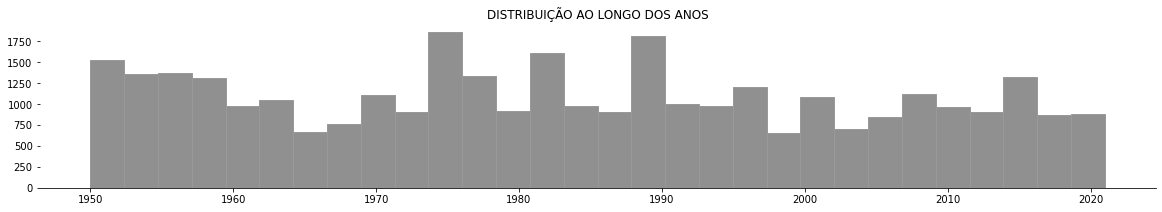

In [78]:
# total de corridas
increase_font()
print('{} é o número total de grandes prêmios em nosso dataset.'.format(df_full['year'].max() - df_full['year'].min()))
print(' ')

# plot histograma
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
# gráfico
ax.hist(df_full['year'], color='#909090', bins=30, edgecolor = "#999999")
ax.set_title('DISTRIBUIÇÃO AO LONGO DOS ANOS')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.("off")
plt.show()

É possivel analisar que a quantidade de corridas não é a mesma. Em alguns anos, existiram mais e outros com menos.   

In [79]:
df_full.columns

Index(['points', 'position', 'positionText', 'wins', 'code', 'forename',
       'surname', 'nationality', 'year', 'round', 'name', 'date'],
      dtype='object')

In [90]:
df_full['nationality'].value_counts()

British              5680
Italian              4130
American             3836
French               3435
German               2610
Brazilian            2052
Finnish              1112
Australian            909
Spanish               893
Belgian               866
Austrian              825
Swedish               643
Argentine             640
Swiss                 639
Japanese              630
South African         604
Dutch                 569
New Zealander         501
Mexican               414
Canadian              405
Russian               201
Danish                199
Colombian             146
Monegasque            142
Rhodesian             141
Venezuelan            137
Irish                 118
Portuguese            110
Polish                 95
Indian                 86
Thai                   68
Chilean                46
Uruguayan              33
Indonesian             21
Hungarian              20
Liechtensteiner        20
Malaysian              18
East German            15
Argentine-It